In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
df_tit = pd.read_csv('/kaggle/input/titanic/train.csv')

In [4]:
df_tit.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
df_tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


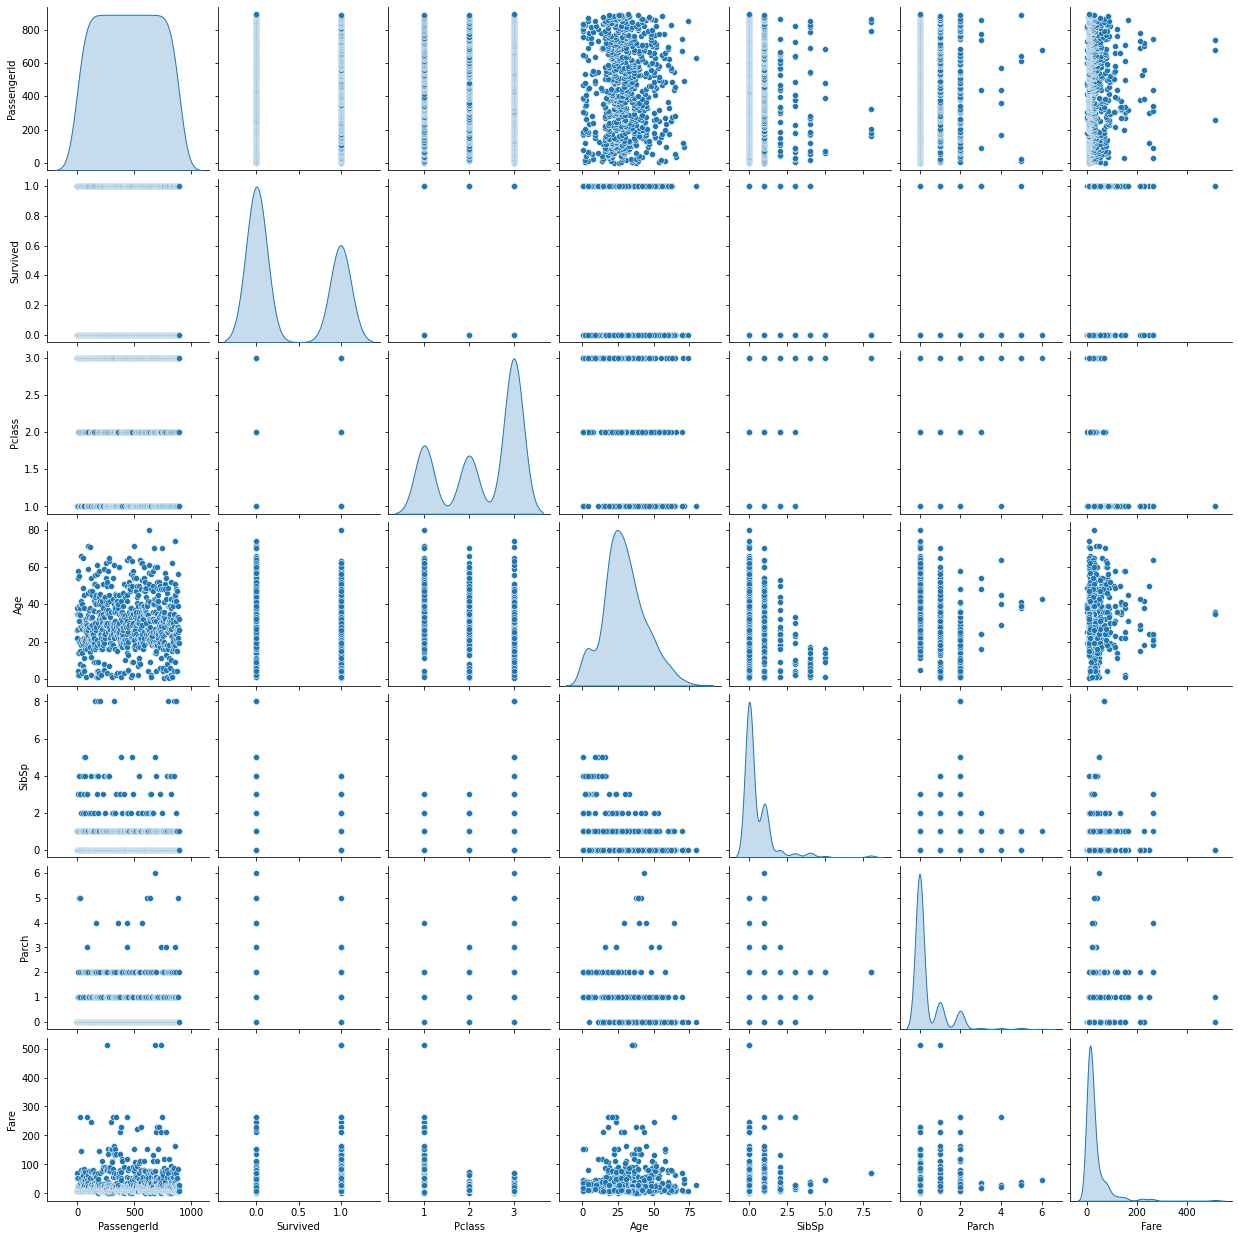

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df_tit, diag_kind='kde')

In [7]:
num_vars = df_tit.select_dtypes(include=['int64','float64'])

In [8]:
num_vars.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500

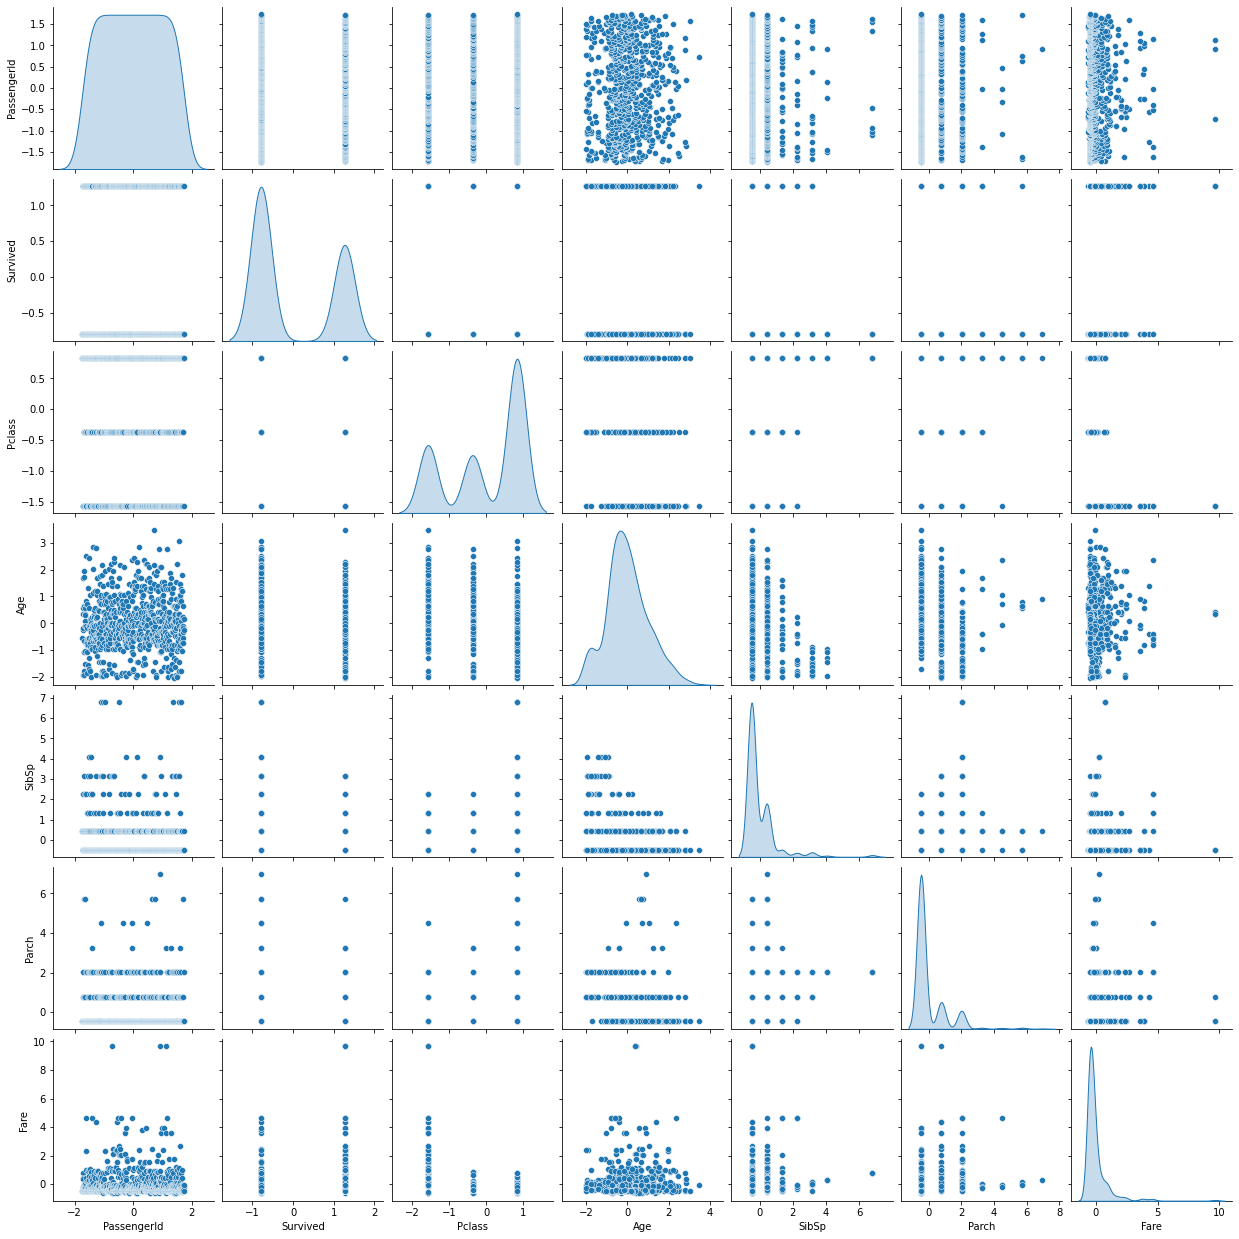

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scale_tit = pd.DataFrame(sc.fit_transform(num_vars))
scale_tit.columns = num_vars.columns
sns.pairplot(scale_tit, diag_kind='kde')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

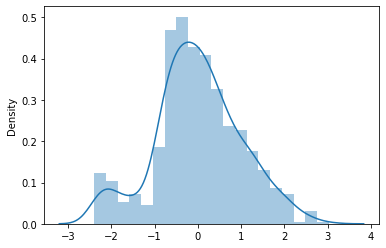

In [10]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedage = pt.fit_transform(num_vars[['Age']])
sns.distplot(transformedage)

In [11]:
power_tit = pd.DataFrame(pt.fit_transform(num_vars))
power_tit.columns = num_vars.columns
power_tit.head()

PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare
0    -2.148141 -0.789272  0.863973 -0.472172  1.373636 -0.560253 -0.878820
1    -2.131830  1.266990 -1.459129  0.605017  1.373636 -0.560253  1.336651
2    -2.117043  1.266990  0.863973 -0.189376 -0.679850 -0.560253 -0.790065
3    -2.103295  1.266990 -1.459129  0.412768  1.373636 -0.560253  1.067352
4    -2.090322 -0.789272  0.863973  0.412768 -0.679850 -0.560253 -0.774439

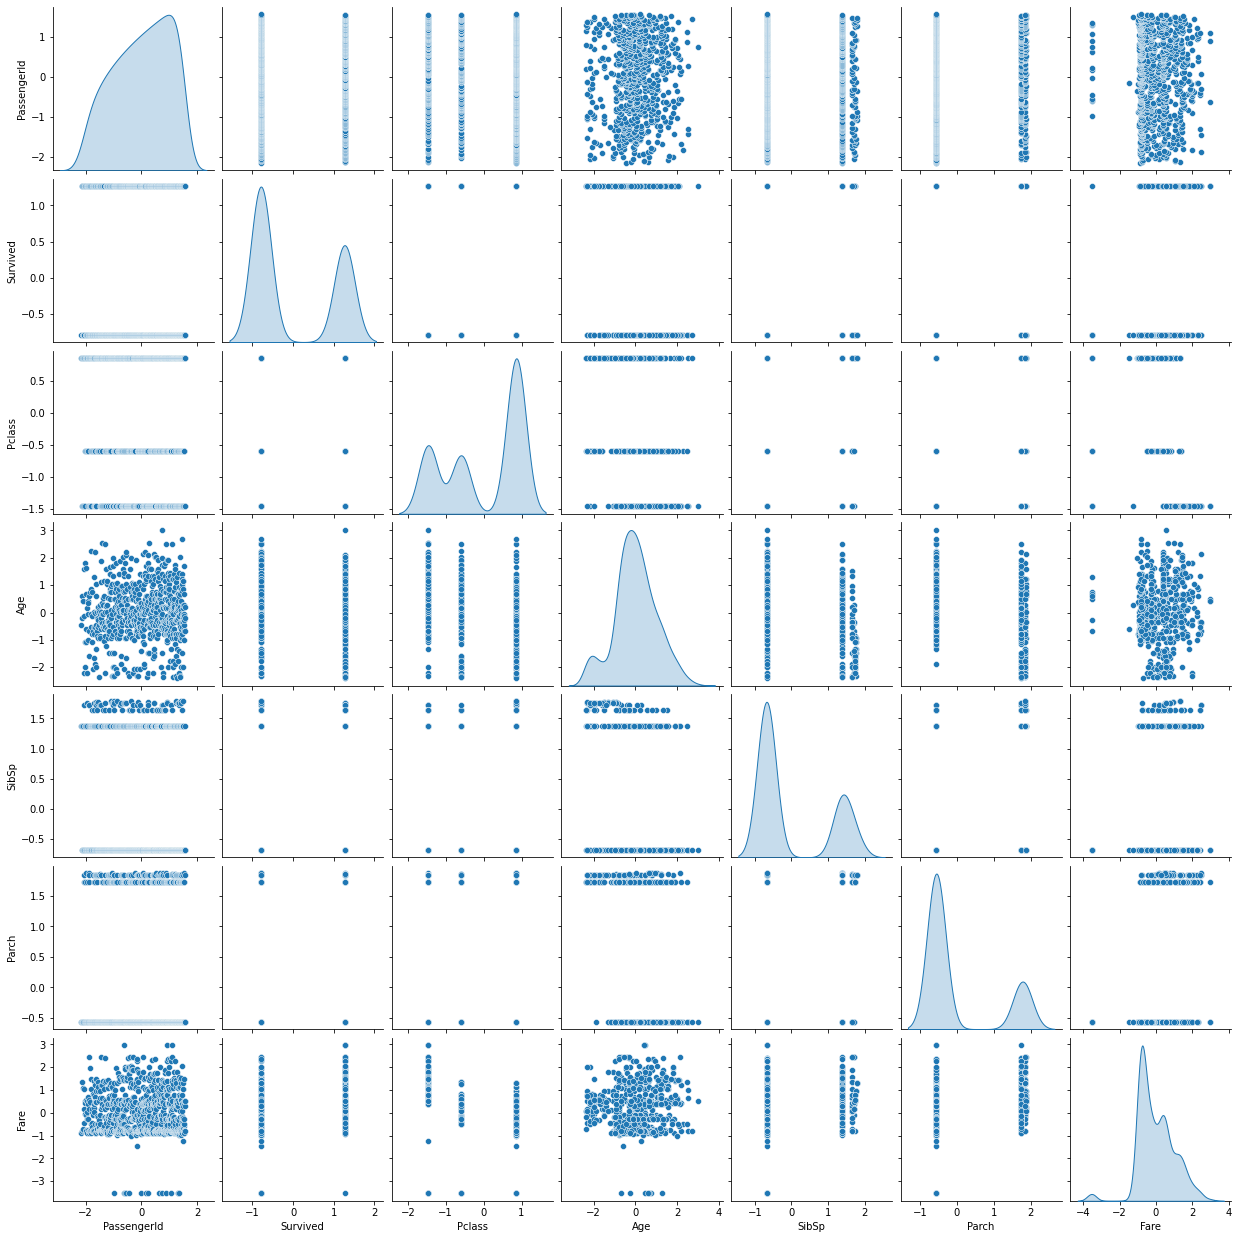

In [12]:
sns.pairplot(power_tit,diag_kind='kde')

<AxesSubplot:>

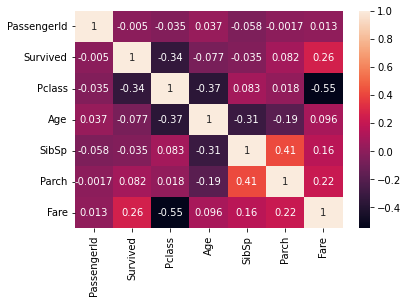

In [13]:
sns.heatmap(num_vars.corr(),annot=True)

In [14]:
from pandas_profiling import ProfileReport
rep = ProfileReport(df_tit)
rep

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**The above report can be saved to a file as below and can be accessed from the directory where saved.**

In [15]:
rep.to_file(output_file='report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#!pip install sweetviz

In [17]:
import sweetviz as sv
sweet_report = sv.analyze(df_tit)
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
#!pip install autoviz

Imported AutoViz_Class version: 0.0.85. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.
Shape of your Data Set loaded: (891, 12)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    12 Predictors classified...
        This does not include the Target column(s)
        3 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 3


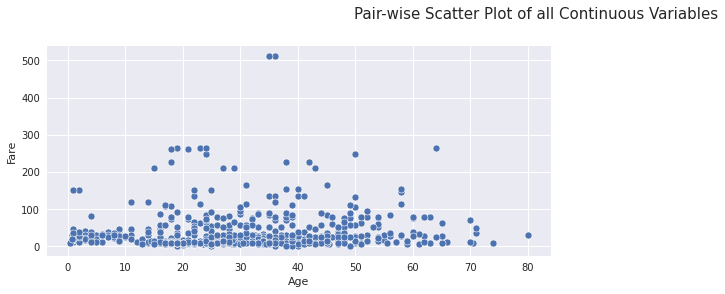

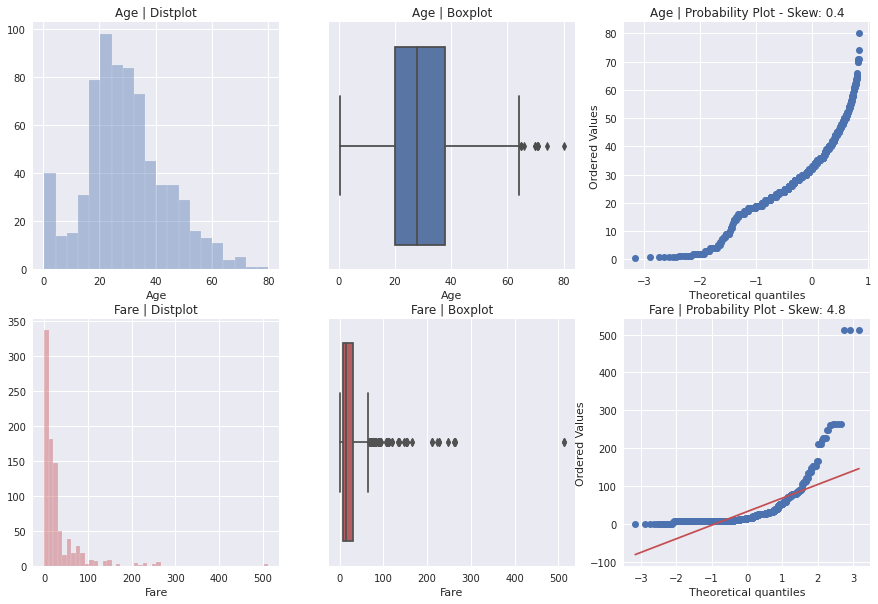

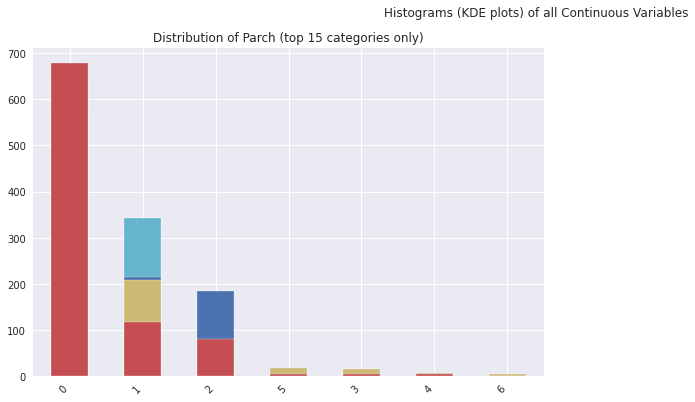

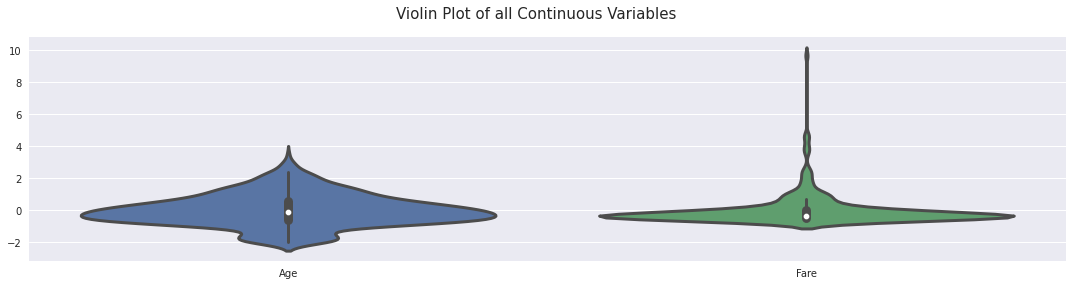

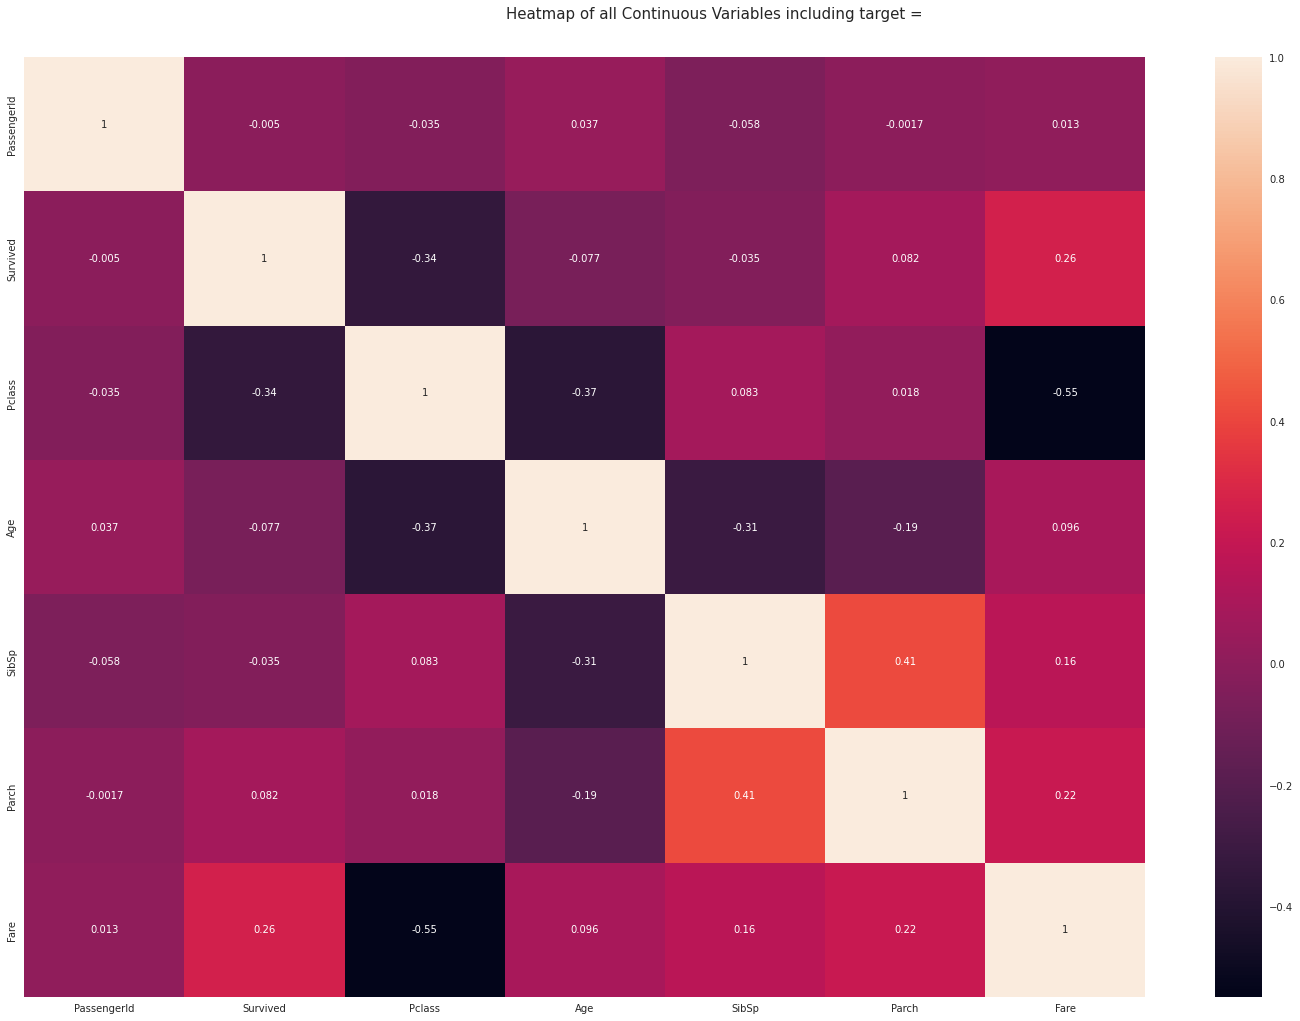

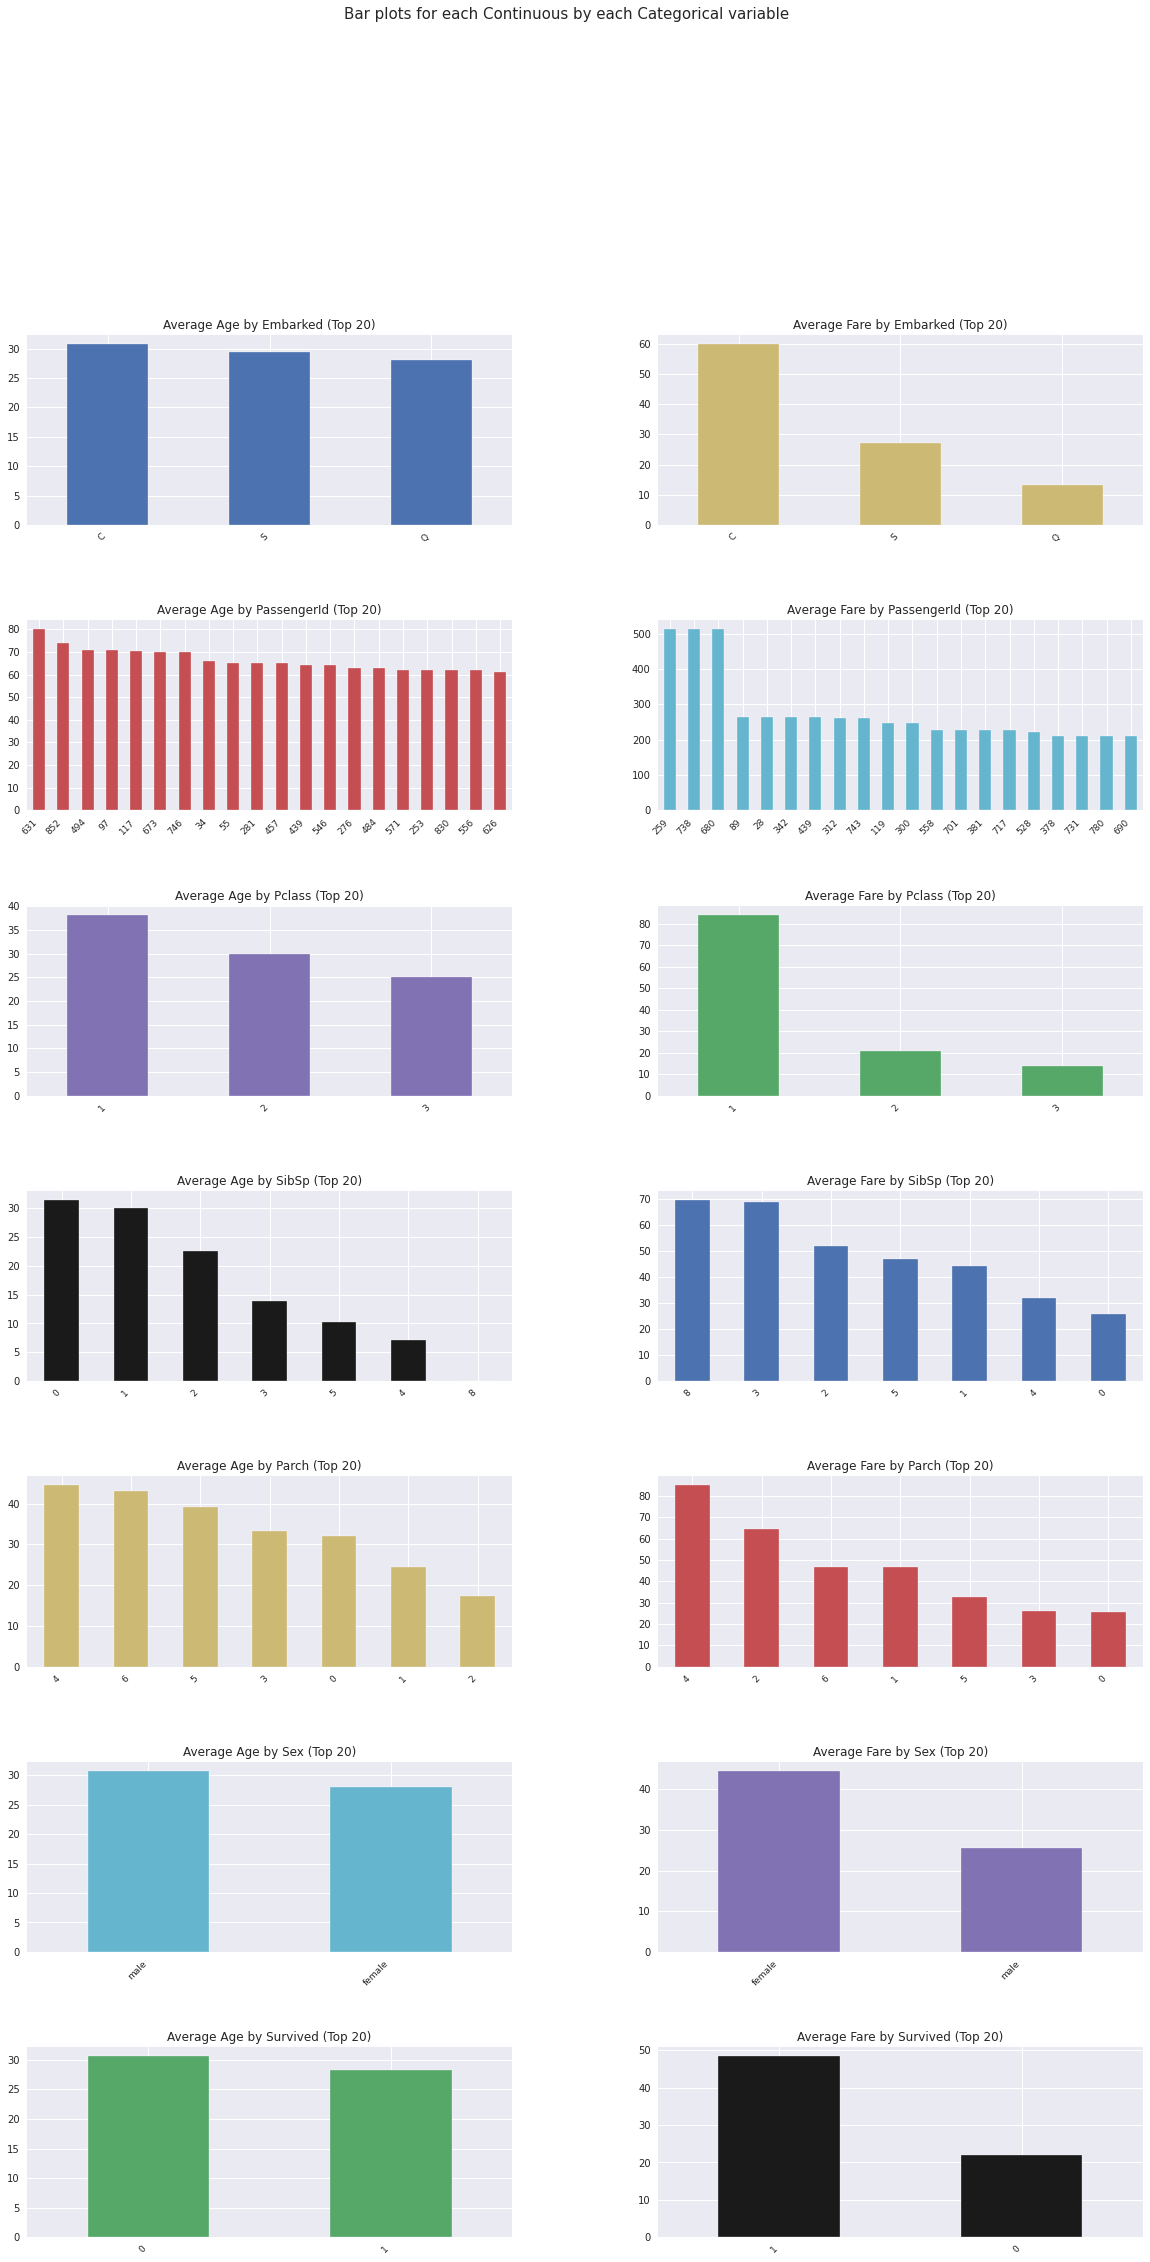

Time to run AutoViz (in seconds) = 7

 ###################### VISUALIZATION Completed ########################


In [19]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz('/kaggle/input/titanic/train.csv')